<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/MC_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation (MLE) for MC

**Maximum Likelihood Estimation (MLE)** is a statistical method used to estimate the parameters of a model. For Markov Chains (MC), this method is commonly employed to determine the transition probabilities based on observed sequences of states.

### Concept:

Imagine you have observed several sequences of states from a Markov Chain, but you don't know the transition probabilities between states. Your goal is to estimate these probabilities in a way that maximizes the likelihood of observing the given sequences, given the model. MLE provides a systematic way to achieve this.

For a Markov Chain, the likelihood function $L$ is the probability of observing the given sequences given a set of transition probabilities. The aim of MLE is to adjust these transition probabilities to maximize $L$.

### Mathematics:

Let's take a simple example of a Markov Chain with two states $A$ and $B$. Let $p$ be the probability of transitioning from state $A$ to state $B$, and $1-p$ be the probability of remaining in state $A$.

Given a sequence of observations, you can count:

- $n_{AA}$: the number of transitions from $A$ to $A$
- $n_{AB}$: the number of transitions from $A$ to $B$

The likelihood function for observing this data given the transition probability $p$ is:
$$
L(p) = (1-p)^{n_{AA}} \times p^{n_{AB}}
$$

The goal of MLE is to find the value of $p$ that maximizes this likelihood function. By differentiating $L$ with respect to $p$ and setting it to zero, you can solve for $p$. In this simple example:
$$
\hat{p}_{MLE} = \frac{n_{AB}}{n_{AA} + n_{AB}}
$$

### Intuition:

This result makes intuitive sense: the estimated probability $\hat{p}_{MLE}$ of transitioning from $A$ to $B$ is just the fraction of times you observed this transition out of all transitions from $A$.

### General Markov Chains:

For Markov Chains with more states, the process is conceptually similar but involves more computations. You'll set up a likelihood function based on the observed state sequences and the transition matrix. Then, by maximizing this function, you'll derive the transition probabilities that are most likely to produce the observed sequences.

In practice, for larger MCs, the counts of transitions between each pair of states are tabulated, and the transition probabilities are calculated as the fraction of transitions from a given state to another state relative to all transitions from the given state.

MLE is a powerful and widely-used method for estimating parameters, and in the context of Markov Chains, it provides an intuitive and efficient way to derive the transition matrix based on observed data.

### Basic example

In [ ]:
!pip install pydtmc


DISCRETE-TIME MARKOV CHAIN
 SIZE:           2
 RANK:           2
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     YES
 SYMMETRIC:      YES



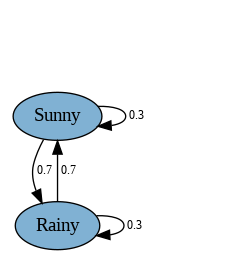

In [ ]:
import pydtmc as dtmc
import numpy as np

# Our observed sequence
observed_sequence = ['Sunny', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Sunny']

# Calculate transition counts
n_ss = sum(1 for i, j in zip(observed_sequence, observed_sequence[1:]) if i == 'Sunny' and j == 'Sunny')
n_sr = sum(1 for i, j in zip(observed_sequence, observed_sequence[1:]) if i == 'Sunny' and j == 'Rainy')
n_rs = sum(1 for i, j in zip(observed_sequence, observed_sequence[1:]) if i == 'Rainy' and j == 'Sunny')
n_rr = sum(1 for i, j in zip(observed_sequence, observed_sequence[1:]) if i == 'Rainy' and j == 'Rainy')

# Calculate transition probabilities using MLE
p_ss = n_ss / (n_ss + n_sr)
p_sr = n_sr / (n_ss + n_sr)
p_rs = n_rs / (n_rr + n_rs)
p_rr = n_rr / (n_rr + n_rs)

# Create the transition matrix
matrix = np.array([[p_ss, p_sr], [p_rs, p_rr]])

# Create the Markov Chain
states = ['Sunny', 'Rainy']
mc = dtmc.MarkovChain(matrix, states)

print(mc)
dtmc.plot_graph(mc, dpi=600)

### More complex

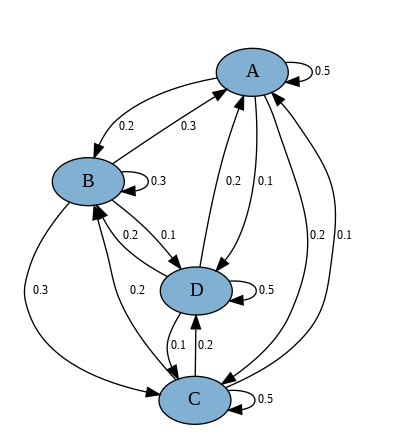

In [ ]:
# Transition matrix for 4 states
A = [[0.5, 0.2, 0.2, 0.1],
     [0.3, 0.3, 0.3, 0.1],
     [0.1, 0.2, 0.5, 0.2],
     [0.2, 0.2, 0.1, 0.5]]

# Create the Markov Chain using PyDTMC
mc = dtmc.MarkovChain(A, ["A", "B", "C", "D"])
dtmc.plot_graph(mc, dpi=600)

#### Simulate a sequence


0.6514940095230688


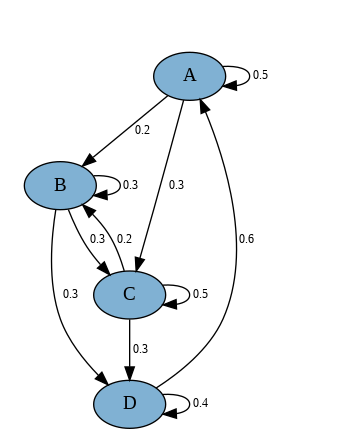

In [ ]:
import pydtmc as dtmc
import numpy as np
from numpy import linalg as LA

n = 20

# Our observed mood sequence
observed_sequence = mc.simulate(n, seed=32)


# Initialize a 4x4 matrix of zeros
transition_counts = np.zeros((4, 4))

# Map states to indices
state_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}

# Calculate transition counts
for i in range(len(observed_sequence) - 1):
    from_state = state_map[observed_sequence[i]]
    to_state = state_map[observed_sequence[i+1]]
    transition_counts[from_state][to_state] += 1

# Calculate transition probabilities using MLE
A_mle = transition_counts / transition_counts.sum(axis=1, keepdims=True)

print (LA.norm(A_mle-A))
mc_mle = dtmc.MarkovChain(A_mle, ["A", "B", "C", "D"])
dtmc.plot_graph(mc_mle, dpi=600)


## General form

The probability of any particular sequence of length $T$ is given by $p(x_{1:T}|\theta) = \pi(x_1)A(x_1,x_2)\dots A(x_{T-1}, x_T )$. Here's a breakdown of the equation:

1. $x_{1:T}$: This represents a sequence of states from the first observation $x_1$ to the $T$-th observation $x_T$.

2. $\pi(x_1)$: This is the probability of starting at state $x_1$, representing the initial state distribution.

3. $A(x_{t-1}, x_t)$: This is the transition probability of moving from state $x_{t-1}$ to state $x_t$.

Given these definitions, the equation for the likelihood of the entire sequence is:
$$
p(x_{1:T}|\theta) = \pi(x_1) \times \prod_{t=2}^{T} A(x_{t-1}, x_t)
$$

This formula calculates the likelihood of the sequence by multiplying the initial state probability by the product of all transition probabilities for the entire sequence.

A general way of writing the above equation is:
$$
p(x_{1:T}|\theta) = \prod_{j}^K \pi_j^{I(x_1=j)}\prod_{t=1}^T\prod_{j=1}^K\prod_{k=1}^{K}A_{jk}^{I(x_t=k,x_{t-1}=j)}
$$


The equation employs products over states and indicator functions to specify when certain states are observed. Let's break it down:

1. $x_{1:T}$: Represents the sequence of states from the first observation $x_1$ to the $T$-th observation $x_T$.

2. $\pi_j$: The probability of starting in state $j$.

3. $I(x_1=j)$: An indicator function that takes the value 1 if the first state $x_1$ is $j$ and 0 otherwise.

4. $A_{jk}$: The transition probability of moving from state $j$ to state  $k$.

5. $I(x_t=k,x_{t-1}=j)$: An indicator function that takes the value 1 if the state at time $t-1$ is $j$ and the state at time $t$ is $k$, and 0 otherwise.

Given these components, the equation can be interpreted as:
  $$
  p(x_{1:T}|\theta) = \prod_{k}^K \pi_j^{I(x_1=j)}
  $$
  This part calculates the probability of starting in each possible initial state $j$. It raises $\pi_j$ to the power of the indicator function, which means if $x_1$ is $j$, then it includes $\pi_j$ in the product, and if not, it just multiplies by 1 (because any number raised to the power of 0 is 1).

$$
\prod_{t=1}^T\prod_{j=1}^K\prod_{k=1}^{K}A_{jk}^{I(x_t=k,x_{t-1}=j)}
$$
This part calculates the likelihood of all the observed transitions in the sequence. For each time step $t$, it considers every possible transition from state $j$ to state $k$. The transition probability $ A_{jk}$ is included in the product only when the transition from $j$ at $t-1$ to $k$ at $t$ is observed, thanks to the indicator function.

Overall, the equation calculates the likelihood of the entire sequence by multiplying the initial state probabilities and all transition probabilities, while using indicator functions to select which probabilities are relevant based on the observed sequence.

## Set of sequences

Consider a set of sequences $D = (\mathbf x_1\dots \mathbf x_N)$, where $\mathbf x_i = (x_{i1}\dots x_{i,Ti} )$ is asequence of length $T_i$. The Likelihhod is given by:
$$
L(D|\theta)=\prod_{n=1}^N p(x_{i:Ti}|\theta)
$$

To understand this formula intuitively:

1. For each sequence $\mathbf x_i$ in $D$, we calculate its likelihood $p(x_{i:Ti}|\theta)$, which is the probability of observing that particular sequence given the parameters $\theta$.

2. We then multiply together all these individual sequence likelihoods to get the overall likelihood of the entire data set $D$.

**Log-likelihood** Insted of using the Likelihood directly it is convinient to employed the log-likelihhod.
$$
\log p(D|\theta)=\sum_{i=1}^N\log\left[p(\mathbf x_i|\theta)\right]
$$

It is possible to proof that:

$$
\sum_{n=1}^N\log(p(\mathbf x_i|\theta)=\sum_{j}N_j^1\log(\pi_j)+\sum_j\sum_k N_{jk}\log A_{jk}
$$
where
$$
N_j^1=\sum_{i}^N I(x_{i1}=j)
$$,
$$
N_{jk}=\sum_{i=1}^N\sum_{t=1}^{T_i-1}I(x_{i,t}=j,x_{i,t+1}=k)
$$,
$$
N_j=\sum_{k}N_{jk}
$$


**Decomposition of the Log-Likelihood:**

The next equation decomposes this log-likelihood into two parts:

1. The sum of the logs of the initial state probabilities.
2. The sum of the logs of the transition probabilities.

Given by:

$$
\sum_{n=1}^N \log(p(\mathbf x_i|\theta)) = \sum_j N_j^1 \log(\pi_j) + \sum_j \sum_k N_{jk} \log A_{jk}
$$

**Where:**

1. $N_j^1 = \sum_{i}^N I(x_{i1} = j)$

   This represents the total number of sequences that start with state $ j $. The indicator function $ I $ equals 1 when $ x_{i1} = j $ and 0 otherwise. So, $ N_j^1 $ is counting how many sequences start in state $ j $.

2. $ N_{jk} = \sum_{i=1}^N \sum_{t=1}^{T_i-1} I(x_{i,t} = j, x_{i,t+1} = k) $

   This counts the total number of transitions from state $ j $ to state $ k $ across all sequences. For each sequence $ i $ and each time $ t $ (up to $ T_i - 1 $), the indicator function checks if the current state is $ j $ and the next state is $ k $.

3. $ N_j = \sum_{k} N_{jk} $

   This simply counts all transitions from state $ j $ to any other state. It aggregates the counts over all possible next states $ k $.

In essence, the decomposition of the log-likelihood allows for a clearer representation of how the initial states and transitions contribute to the probability of observing the given data set. The terms $ N_j^1 $, $ N_{jk} $, and $ N_j $ provide a compact way of capturing the frequency of different events in the sequences, making parameter estimation (like maximum likelihood estimation) more straightforward.

By adding Lagrange multipliers to enforce the sum to one constraints, one can show that the MLE is given by the normalized counts:


The method uses observed data to estimate the probabilities in a way that is most consistent with the data. Now, let's break down the formulas:

1. **Initial State Distribution (MLE for \( \pi_j \))**:

   $$
   \hat\pi_j = \frac{N_j^1}{\sum_{j'}N_{j'}^1}
   $$

   Here:

   - $N_j^1$ represents the total number of sequences that start with state $ j $.
   - The denominator $ \sum_{j'}N_{j'}^1 $ sums over all possible starting states, giving the total number of sequences.
   
   The ratio $ \frac{N_j^1}{\sum_{j'}N_{j'}^1} $ effectively gives the proportion of sequences that start with state $ j$. This is the estimated probability of starting in state $ j $ based on the data.

2. **Transition Probabilities (MLE for $ A_{ij} $)**:

   $$
   \hat{A}_{ij} = \frac{N_{jk}}{N_j}
   $$

   Here:

   - $N_{jk}$  counts the number of transitions from state $ j $ to state $ k $ observed in the data.
   - $N_j$ represents the total number of transitions from state $j $ to any other state.
   
   The ratio $ \frac{N_{jk}}{N_j} $ computes the proportion of times, given that we're in state $ j $, that we transition to state \( k \). This becomes our estimated probability of moving from state $ j$ to state $ k $ based on the data.

In essence, the MLE approach looks at the data to see "what actually happened" and then uses these observed frequencies to estimate the most likely parameters of the Markov Chain.

### Text example

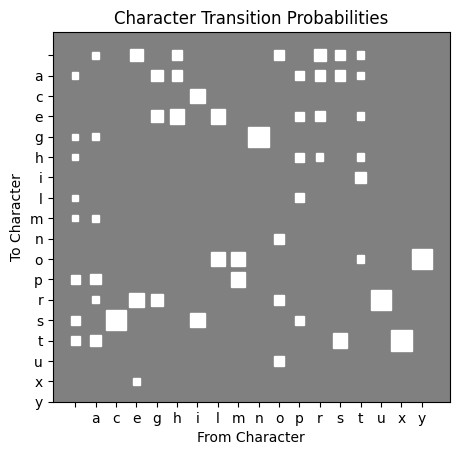

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hinton(matrix, max_weight=None, ax=None):
    """Draw a Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

def compute_transition_probabilities(text):
    # Preprocesamiento: convertir todo a minúsculas y eliminar caracteres no deseados
    text = ''.join([c for c in text.lower() if c.isalpha() or c.isspace()])

    # Construir el conteo N_jk
    unique_chars = sorted(set(text))
    num_chars = len(unique_chars)
    N_jk = np.zeros((num_chars, num_chars))
    char_to_index = {char: index for index, char in enumerate(unique_chars)}

    for i in range(len(text) - 1):
        current_char = char_to_index[text[i]]
        next_char = char_to_index[text[i+1]]
        N_jk[current_char, next_char] += 1

    # Calcular A_ij usando MLE
    N_j = N_jk.sum(axis=1)
    A_ij = N_jk / N_j[:, None]

    return A_ij, unique_chars

text = "your sample text here, perhaps a longer paragraph to gather more statistics"
transition_probs, labels = compute_transition_probabilities(text)

# Visualizar usando un diagrama de Hinton
hinton(transition_probs)
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
plt.xlabel('From Character')
plt.ylabel('To Character')
plt.title('Character Transition Probabilities')
plt.show()
